# Head

In [4]:
import pandas as pd
from pathlib import Path
home = Path.home()

models = ['deepseek_v3', 'gemma3', 'llama4', 'qwq', 'qwen3']
# models = ['deepseek_v3', 'gemma3', 'llama4']

suffixes = None
# suffixes = '_sent_shuffle'
# suffixes = '_tail'
if suffixes is not None:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}_TLDR{suffixes}.txt' for model in models]
else:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}_TLDR.txt' for model in models]

df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/test.tsv', sep='\t')
for model, csv_file in zip(models, csv_files):
    single_df = pd.read_csv(csv_file, sep='\t', header=None, names=[model])
    df = df.join(single_df)

for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    df = df.drop(index-2)  # Adjusting for zero-based index
df

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...
...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This study identifies hybrid peptides formed b...
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to engine...,This work describes a multiplex genome editing...


# Fetch and save metrics

In [4]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm

MYSQL_HOST = '144.214.39.113'
MYSQL_USER = 'key'
MYSQL_PASS = 'Keydge11'
MYSQL_DB = 'keydge'

engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}/{MYSQL_DB}?charset=utf8mb4')

paper_ids = df['paper_id'].unique().tolist()
BATCH_SIZE = 500  # 每批查多少条，可调大或调小

results = []
# 用tqdm显示批次进度和预计完成时间
for i in tqdm(range(0, len(paper_ids), BATCH_SIZE), desc="Querying titles", unit="batch"):
    batch = paper_ids[i:i+BATCH_SIZE]
    id_str = ','.join(str(int(pid)) for pid in batch)
    sql = f"SELECT paper_id, C3, C10, C_total, beauty_coefficient, awakening_year FROM paper_metrics WHERE paper_id IN ({id_str})"
    batch_df = pd.read_sql(sql, engine)
    results.append(batch_df)

# 合并所有批次的查询结果
paper_metrics_df = pd.concat(results, ignore_index=True)
display(paper_metrics_df)

Querying titles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 58/58 [01:25<00:00,  1.48s/batch]


,paper_id,C3,C10,C_total,beauty_coefficient,awakening_year
0,1353153,35.0,80.0,119,0.0000,2000
1,1634910,16.0,43.0,61,4.5000,2006
2,1655469,17.0,42.0,63,0.0000,2000
3,1778349,78.0,226.0,292,0.3214,1999
4,2550721,22.0,49.0,66,0.6250,2001
...,...,...,...,...,...,...
28525,130505215,NaN,NaN,48,-0.0882,2022
28526,130830512,NaN,NaN,37,-0.0769,2022
28527,134721303,NaN,NaN,63,-0.1875,2022
28528,135317206,NaN,NaN,28,-0.2273,2022


In [6]:
paper_metrics_df.fillna(0, inplace=True)
paper_metrics_df['C3'] = paper_metrics_df['C3'].astype(int)
paper_metrics_df['C10'] = paper_metrics_df['C10'].astype(int)
paper_metrics_df['C_total'] = paper_metrics_df['C_total'].astype(int)
display(paper_metrics_df)
paper_metrics_df.to_parquet(home / 'projects/TLDR/data/paper_metrics.parquet', index=False)

,paper_id,C3,C10,C_total,beauty_coefficient,awakening_year
0,1353153,35,80,119,0.0000,2000
1,1634910,16,43,61,4.5000,2006
2,1655469,17,42,63,0.0000,2000
3,1778349,78,226,292,0.3214,1999
4,2550721,22,49,66,0.6250,2001
...,...,...,...,...,...,...
28525,130505215,0,0,48,-0.0882,2022
28526,130830512,0,0,37,-0.0769,2022
28527,134721303,0,0,63,-0.1875,2022
28528,135317206,0,0,28,-0.2273,2022


# Load paper metrics

In [5]:
paper_metrics_df = pd.read_parquet(home / 'projects/TLDR/data/paper_metrics.parquet')

df = pd.merge(df, paper_metrics_df, on='paper_id', how='left')
df.fillna(0, inplace=True)
df['C3'] = df['C3'].astype(int)
df['C10'] = df['C10'].astype(int)
df['C_total'] = df['C_total'].astype(int)
df['awakening_year'] = df['awakening_year'].astype(int)

display(df)

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,C3,C10,C_total,beauty_coefficient,awakening_year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,12,90,516,7.7912,2017
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,21,53,149,165.3750,2020
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,21,67,97,-1.0600,2001
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,28,156,249,1.6553,2005
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,69,196,426,0.0000,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35616,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,64,216,286,-0.1667,2010
35617,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,136,0,239,0.0197,2019
35618,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This study identifies hybrid peptides formed b...,189,0,388,-0.2716,2017
35619,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study demonstrates a multiplex genome-edi...,This work reports on a cell engineering strate...,This study identifies a strategy for broad imm...,This study describes a dual strategy to engine...,This work describes a multiplex genome editing...,155,0,210,-0.3491,2021


# Match MAG PaperID

In [8]:
import pickle
print("Loading doi_mag_pid_dict...")
with open(home / "projects/TLDR/data/doi_mag_pid_dict.pkl", "rb") as f:
    doi_mag_pid_dict = pickle.load(f)
    print("doi_mag_pid_dict loaded.")

df['mag_pid'] = df['doi'].map(doi_mag_pid_dict)
df = df.dropna(subset=['mag_pid'])
df.loc[:, 'mag_pid'] = df['mag_pid'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)
df.loc[:, 'mag_pid'] = df['mag_pid'].astype(int)
display(df)

Loading doi_mag_pid_dict...
doi_mag_pid_dict loaded.


,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,C3,C10,C_total,beauty_coefficient,awakening_year,title,mag_pid
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,12,90,516,7.7912,2017,Evidence for two independent domestications of...,2005395185
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,21,53,149,165.3750,2020,The Origin of the Domestic Pig: Independent Do...,2110049233
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,21,67,97,-1.0600,2001,Fine-mapping of quantitative trait loci by ide...,2082900742
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,28,156,249,1.6553,2005,Extensive Genome-wide Linkage Disequilibrium i...,2103106090
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,69,196,426,0.0000,1994,Genetic mapping of quantitative trait loci for...,2045457895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35616,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,64,216,286,-0.1667,2010,Expansion of Human Regulatory T-Cells From Pat...,2137227986
35617,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,136,0,239,0.0197,2019,Selective targeting of engineered T cells usin...,2789780246
35618,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This study identifies hybrid peptides formed b...,189,0,388,-0.2716,2017,Pathogenic CD4 T cells in type 1 diabetes reco...,2266478788
35619,10.1073/pnas.1902566116,82979762,Pol

# Load publication venue and year from MAG

In [12]:
MAG_paper_df = pd.read_parquet(home / 'projects/TLDR/data/MAG_paper.parquet')
df = df.merge(MAG_paper_df[['VenueID', 'Year']], left_on='mag_pid', right_index=True, how='inner')
df.rename(columns={'VenueID': 'mag_vid', 'Year': 'year'}, inplace=True)
display(df)

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,C3,C10,C_total,beauty_coefficient,awakening_year,title,mag_pid,mag_vid,year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,12,90,516,7.7912,2017,Evidence for two independent domestications of...,2005395185,125754415,1994
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,21,53,149,165.3750,2020,The Origin of the Domestic Pig: Independent Do...,2110049233,65932378,2000
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,21,67,97,-1.0600,2001,Fine-mapping of quantitative trait loci by ide...,2082900742,125754415,1999
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,28,156,249,1.6553,2005,Extensive Genome-wide Linkage Disequilibrium i...,2103106090,43092948,2000
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,69,196,426,0.0000,1994,Genetic mapping of quantitative trait loci for...,2045457895,3880285,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35616,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,64,216,286,-0.1667,2010,Expansion of Human Regulatory T-Cells From Pat...,2137227986,129060628,2009
35617,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,136,0,239,0.0197,2019,Selective targeting of engineered T cells usin...,2789780246,3880285,2018
35618,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This study identifies hybrid peptides formed b...,189,0,

# Load subject label

In [10]:
label_df = pd.read_parquet(home / 'projects/TLDR/data/cluster_df.parquet')
label_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,gnn_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,0,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,0,3
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,0,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,0,3
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,19,1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,14,1
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,14,1
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,10,1


In [13]:
df = df.merge(label_df[['kmeans_label', 'Scopus_label']], left_on='mag_vid', right_index=True, how='inner')
df.rename(columns={'kmeans_label': 'p2v_label', 'Scopus_label': 'scopus_label'}, inplace=True)
df

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,C3,C10,C_total,beauty_coefficient,awakening_year,title,mag_pid,mag_vid,year,p2v_label,scopus_label
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,12,90,516,7.7912,2017,Evidence for two independent domestications of...,2005395185,125754415,1994,17,Multidisciplinary
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,21,53,149,165.3750,2020,The Origin of the Domestic Pig: Independent Do...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology"
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,21,67,97,-1.0600,2001,Fine-mapping of quantitative trait loci by ide...,2082900742,125754415,1999,17,Multidisciplinary
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,28,156,249,1.6553,2005,Extensive Genome-wide Linkage Disequilibrium i...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology"
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,69,196,426,0.0000,1994,Genetic mapping of quantitative trait loci for...,2045457895,3880285,1994,8,Multidisciplinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35616,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,64,216,286,-0.1667,2010,Expansion of Human Regulatory T-Cells From Pat...,2137227986,129060628,2009,17,Medicine
35617,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,136,0,239,0.0197,2019,Selective targeting of engineered T cells usin...,2789780246,3880285,2018,8,Multidisciplinary
35618,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid in

# Load paper title

In [6]:
df = pd.merge(df, pd.read_parquet(home / 'projects/TLDR/data/paper_title.parquet'), on='paper_id', how='left')
df

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,C3,C10,C_total,beauty_coefficient,awakening_year,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,12,90,516,7.7912,2017,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,21,53,149,165.3750,2020,The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,21,67,97,-1.0600,2001,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,28,156,249,1.6553,2005,Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,69,196,426,0.0000,1994,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35616,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,64,216,286,-0.1667,2010,Expansion of Human Regulatory T-Cells From Pat...
35617,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,136,0,239,0.0197,2019,Selective targeting of engineered T cells usin...
35618,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This study identifies hybrid peptides formed b...,189,0,388,-0.2716,2017,Pathogenic CD4 T cells in type 1 diabetes reco...
35619,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,Thi

# Fetch author given name

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm

MYSQL_HOST = '144.214.39.113'
MYSQL_USER = 'key'
MYSQL_PASS = 'Keydge11'
MYSQL_DB = 'keydge'

engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}/{MYSQL_DB}?charset=utf8mb4')

paper_ids = df['paper_id'].unique().tolist()
BATCH_SIZE = 500

results = []
for i in tqdm(range(0, len(paper_ids), BATCH_SIZE), desc="Querying first authors", unit="batch"):
    batch = paper_ids[i:i+BATCH_SIZE]
    id_str = ','.join(str(int(pid)) for pid in batch)
    # position=1 表示第一作者
    sql = f"""
        SELECT paper_id, given_name 
        FROM paper_authorship 
        WHERE paper_id IN ({id_str}) AND position=1
    """
    batch_df = pd.read_sql(sql, engine)
    results.append(batch_df)

first_author_df = pd.concat(results, ignore_index=True)

display(first_author_df)

Querying Crossref: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.02paper/s]


In [100]:
first_author_df

,paper_id,given_name
0,1353153,Alice J.A.M.
1,1634910,C. S.
2,1655469,N. V.
3,1778349,J.
4,2550721,S. H.
...,...,...
30983,83433077,Abul K.
30984,104021261,S. R.
30985,104393236,Wei
30986,123181209,Divya J.


# Regression

## Subject prediction

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import HashingVectorizer
from tqdm import tqdm
import numpy as np

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0
X = df['deepseek_v3'].astype(str).fillna('')

vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
X_vec = vectorizer.transform(X)

clf = MultinomialNB()
clf.fit(X_vec, y)

errors = np.abs(clf.predict_proba(X_vec)[:, 1] - y.values)
print(errors)

Vectorizing documents:   0%|                                                                                                            | 0/34146 [00:00<?, ?it/s]

Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 58904.87it/s]


[0.40570381 0.32599368 0.36204155 ... 0.76947062 0.12159538 0.06380663]


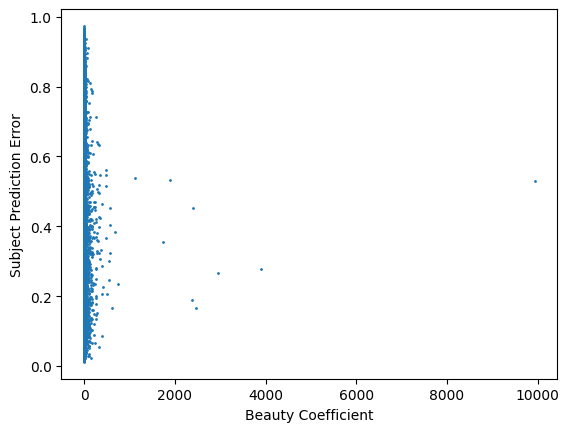

In [42]:
import matplotlib.pyplot as plt

plt.scatter(df['beauty_coefficient'], errors, s=1)
plt.xlabel('Beauty Coefficient')
plt.ylabel('Subject Prediction Error')
plt.show()

## Title matching 

In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm

pos_df = df.copy()

# 标记正样本
pos_df['title_paired'] = True

# 收集负样本
neg_samples = []
rng = np.random.default_rng(42)  # 固定随机种子便于复现

for idx, row in tqdm(pos_df.iterrows(), total=len(pos_df), desc="生成负样本"):
    # 查找同学科标签但不同paper_id的候选title
    candidates = pos_df[(pos_df['p2v_label'] == row['p2v_label']) & (pos_df['paper_id'] != row['paper_id'])]
    if not candidates.empty:
        neg_title = rng.choice(candidates['title'].values)
        neg_row = row.copy()
        neg_row['title'] = neg_title
        neg_row['title_paired'] = False
        neg_samples.append(neg_row)
    else:
        # 如果没有同学科不同paper的title可选，可以跳过或从全局采样（这里选择跳过）
        raise ValueError(f"没有找到与行 {idx} 同学科但不同paper_id的候选title。")

neg_df = pd.DataFrame(neg_samples)

# 合并正负样本
title_match_df = pd.concat([pos_df, neg_df], ignore_index=True)

生成负样本:   0%|                                                                                                             | 21/34146 [00:00<02:43, 208.76it/s]

生成负样本: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [01:26<00:00, 394.48it/s]


In [15]:
title_match_df

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,C3,...,C_total,beauty_coefficient,awakening_year,title,mag_pid,mag_vid,year,p2v_label,scopus_label,title_paired
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,12,...,516,7.7912,2017,Evidence for two independent domestications of...,2005395185,125754415,1994,17,Multidisciplinary,True
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,21,...,149,165.3750,2020,The Origin of the Domestic Pig: Independent Do...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology",True
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,21,...,97,-1.0600,2001,Fine-mapping of quantitative trait loci by ide...,2082900742,125754415,1999,17,Multidisciplinary,True
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,28,...,249,1.6553,2005,Extensive Genome-wide Linkage Disequilibrium i...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology",True
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,69,...,426,0.0000,1994,Genetic mapping of quantitative trait loci for...,2045457895,3880285,1994,8,Multidisciplinary,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68287,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,64,...,286,-0.1667,2010,Experience and Activity-Dependent Maturation o...,2137227986,129060628,2009,17,Medicine,False
68288,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,136,...,239,0.0197,2019,A Clonogenic Bone Marrow Progenitor Specific f...,2789780246,3880285,2018,8,Multidisciplinary,False
68289,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows tha

In [ ]:
import numpy as np
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 设定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 评价指标
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds),
        'recall': recall_score(labels, preds),
        'f1': f1_score(labels, preds)
    }

class TitlePairDataset(torch.utils.data.Dataset):
    def __init__(self, titles, contents, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(
            titles, contents,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

# 配置
text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = title_match_df['title_paired'].astype(int)

# tokenizer和model（可选用其它bert变体）
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

feat = 'deepseek_v3'  # 选择特征列

print(f"\nProcessing feature: {feat}")
X_title = title_match_df['title'].astype(str).fillna('').tolist()
X_content = title_match_df[feat].astype(str).fillna('').tolist()

# 构造Dataset
dataset = TitlePairDataset(X_title, X_content, y, tokenizer)

# 新建模型
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

training_args = TrainingArguments(
    output_dir="title_tmp_distilbert_single_split",
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    save_strategy='no',
    learning_rate=2e-5,
    logging_steps=50,
    report_to=[],
    seed=42
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    compute_metrics=compute_metrics,
)

trainer.train()


Processing feature: deepseek_v3


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
50,0.546600
100,0.133200
150,0.119200
200,0.092500
250,0.054800
300,0.065800
350,0.063200
400,0.065000
450,0.049400
500,0.043800


TrainOutput(global_step=1068, training_loss=0.08441750716404076, metrics={'train_runtime': 165.4013, 'train_samples_per_second': 412.887, 'train_steps_per_second': 6.457, 'total_flos': 2261615897253888.0, 'train_loss': 0.08441750716404076, 'epoch': 1.0})

In [ ]:
# 得到预测结果对象
pred_output = trainer.predict(dataset)

[[7.5970858e-04 9.9924028e-01]
 [7.3170662e-04 9.9926835e-01]
 [1.2134960e-03 9.9878651e-01]
 ...
 [9.9699831e-01 3.0017546e-03]
 [9.9832124e-01 1.6787002e-03]
 [9.9829298e-01 1.7069789e-03]]


In [ ]:
import torch.nn.functional as F
# logits shape: (num_samples, num_labels)
logits = pred_output.predictions
probs = F.softmax(torch.from_numpy(logits), dim=-1).numpy()  # 概率 shape: (num_samples, num_labels)

errors = np.abs(probs[:, 1] - y.values)
print(errors)

[0.00075972 0.00073165 0.00121349 ... 0.00300175 0.0016787  0.00170698]


In [72]:
title_match_df['title_error'] = errors

In [83]:
pd.set_option('display.max_colwidth', None)

<Axes: xlabel='p2v_label', ylabel='title_error'>

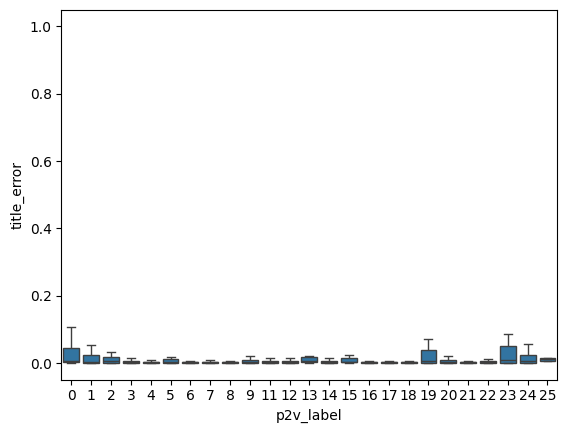

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='p2v_label', y='title_error', data=title_match_df, fliersize=0)

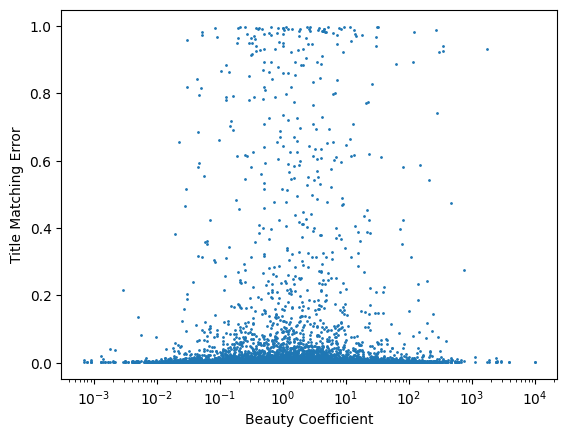

In [94]:
import matplotlib.pyplot as plt

plt.scatter(title_match_df['beauty_coefficient'], errors, s=1)
# plt.xlim(0, 100)
plt.xscale('log')
plt.xlabel('Beauty Coefficient')
plt.ylabel('Title Matching Error')
plt.show()